In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('/content/TimeSeries-sales.csv')
data.head()

,Year,Sales
0,1989,2354.34
1,1990,2379.71
2,1991,2318.52
3,1992,2468.99
4,1993,2386.09


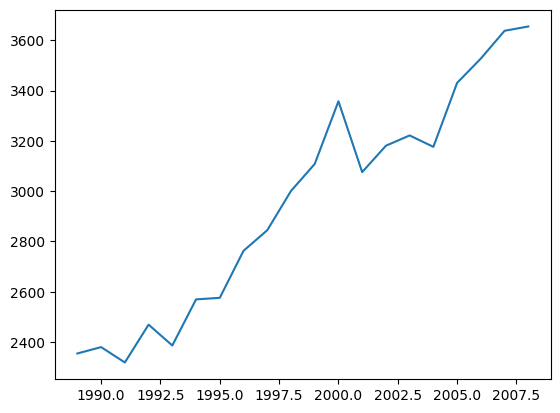

In [84]:
plt.plot(data['Year'], data['Sales'])
plt.show()

In [85]:
def MA(data, window_size):
    res = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size] #ทำการ shot graph
        avg = np.mean(window) #หาค่า mean
        res.append(avg)
    return np.array(res)

In [86]:
#คำนวณค่าที่หายไป
window_size = 3
z = (window_size-1)//2

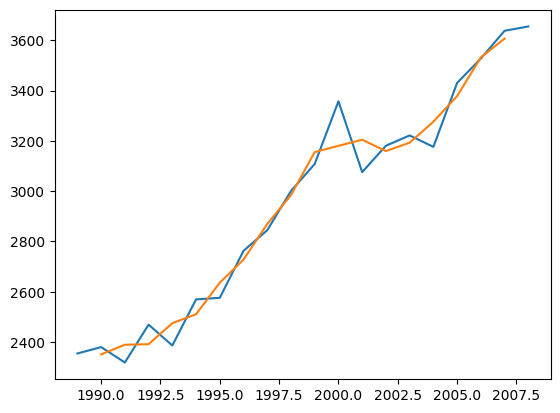

In [87]:
smooth_3 = MA(data['Sales'], 3)
plt.plot(data['Year'], data['Sales'])
plt.plot(data[z:-z]['Year'], smooth_3)
plt.show()

In [88]:
data = pd.read_csv('/content/TimeSeries-daily-max-temperatures.csv')
data.head()

,Date,Temperature
0,1981-01-01,38.1
1,1981-01-02,32.4
2,1981-01-03,34.5
3,1981-01-04,20.7
4,1981-01-05,21.5


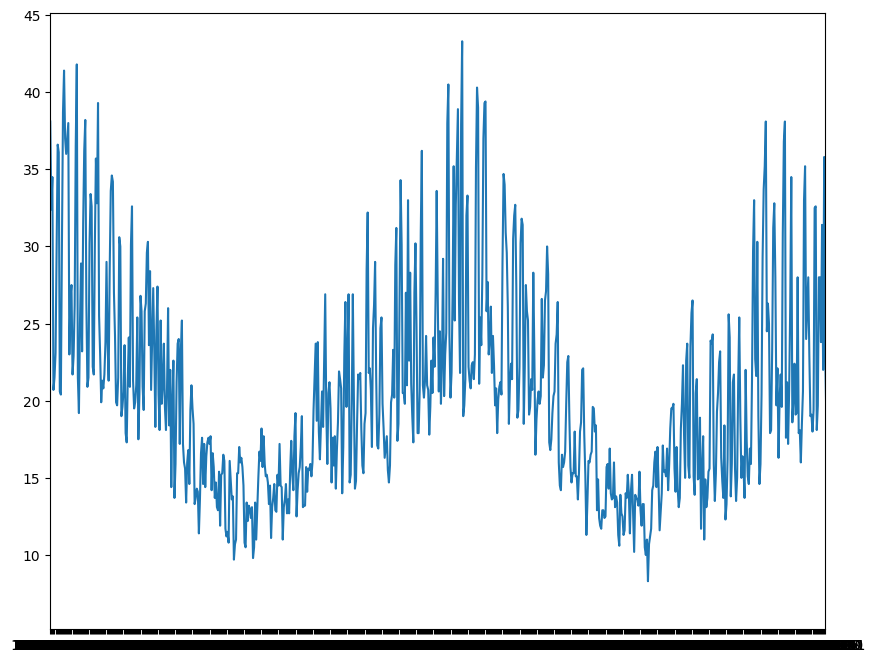

In [89]:
plt.figure(figsize= (10,8)) #ปรับขนาดของกราฟ
plt.plot(data['Date'], data['Temperature'])
plt.xlim('1981-01-01', '1983-01-01') # 2ปี
plt.show()

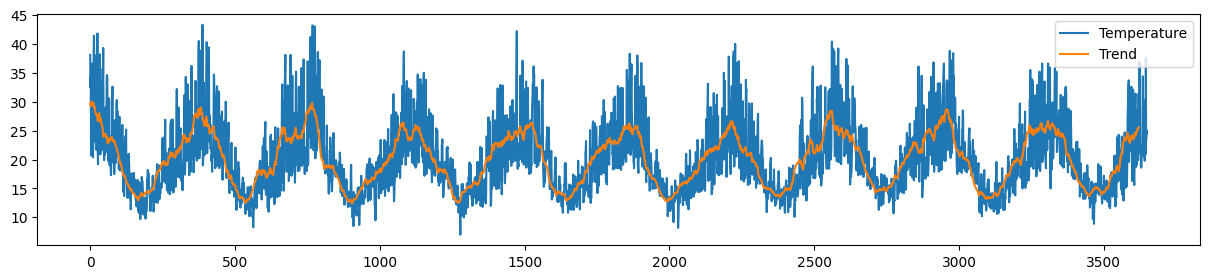

In [90]:
temperature = data['Temperature']
trend = MA(temperature, 30)
plt.figure(figsize= (15,3))
plt.plot(temperature)
plt.plot(trend)
plt.legend(['Temperature', 'Trend'])
plt.show()

In [91]:
# Padding เติมขอบ
padding = len(temperature) - len(trend)
left_padding = padding // 2
right_padding = padding - left_padding
trend = np.pad(trend, (left_padding, right_padding))
print(len(trend),len(temperature))


3650 3650


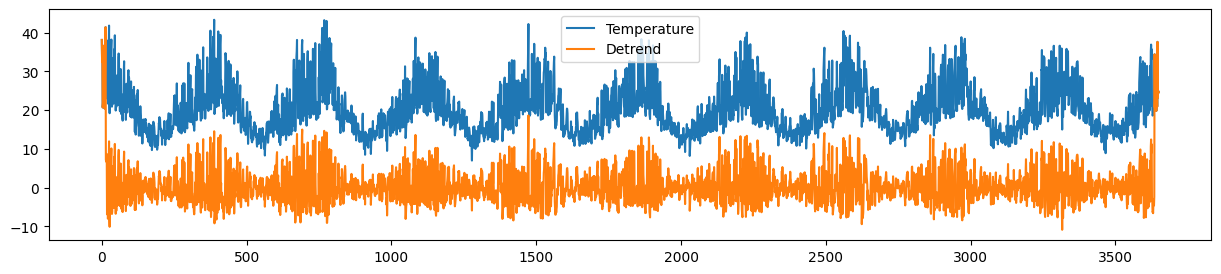

In [92]:
# step 2 find Detrend
detrend = [temperature[i] - trend[i] if trend[i] is not None else None for i in range(len(temperature))]
plt.figure(figsize= (15,3))
plt.plot(temperature)
plt.plot(detrend)
plt.legend(['Temperature', 'Detrend'])
plt.show()

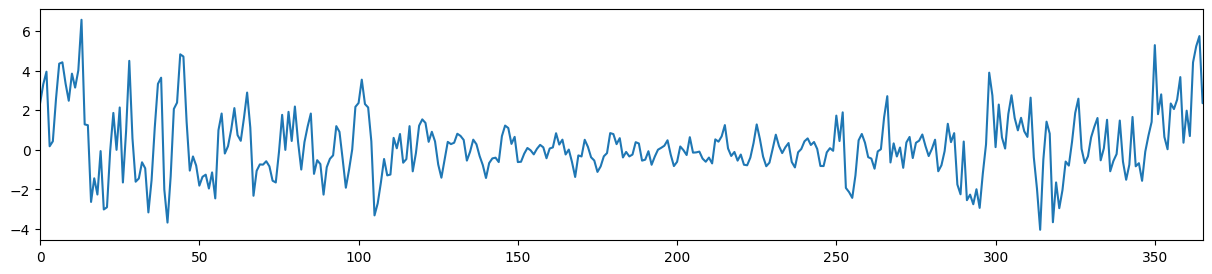

In [93]:
# Step 3 : Find Seasonal
seasonal = [0]*len(temperature)
period = 365
for i in range(period):
  s_win = [detrend[j] for j in range(i, len(temperature), period) if detrend[j] is not None]
  s_avg = np.mean(s_win)
  for j in range(i, len(temperature), period):
    seasonal[j] = s_avg
plt.figure(figsize= (15,3))
# plt.plot(temperature)
plt.plot(seasonal)
plt.xlim(0,365)
# plt.legend(['Temperature', 'Seasonal'])
plt.show()


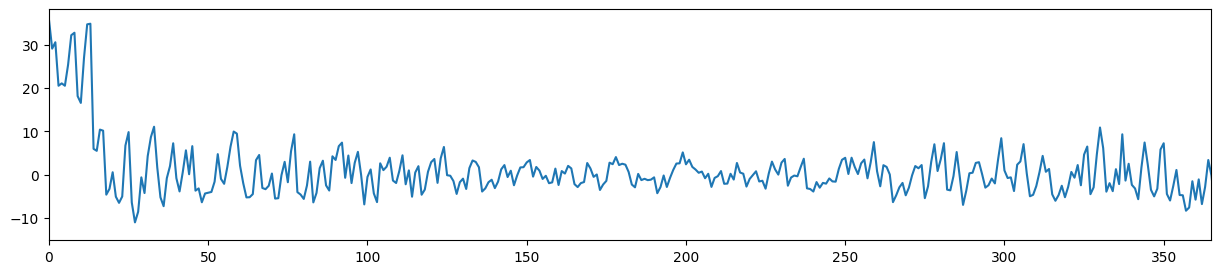

In [94]:
# Step 4 : residual
residual = [temperature[i]-trend[i]-seasonal[i] if trend[i] is not None else None for i in range(len(temperature))]
plt.figure(figsize= (15,3))
# plt.plot(temperature)
plt.plot(residual)
plt.xlim(0,365)
# plt.legend(['Temperature', 'Residual'])
plt.show()

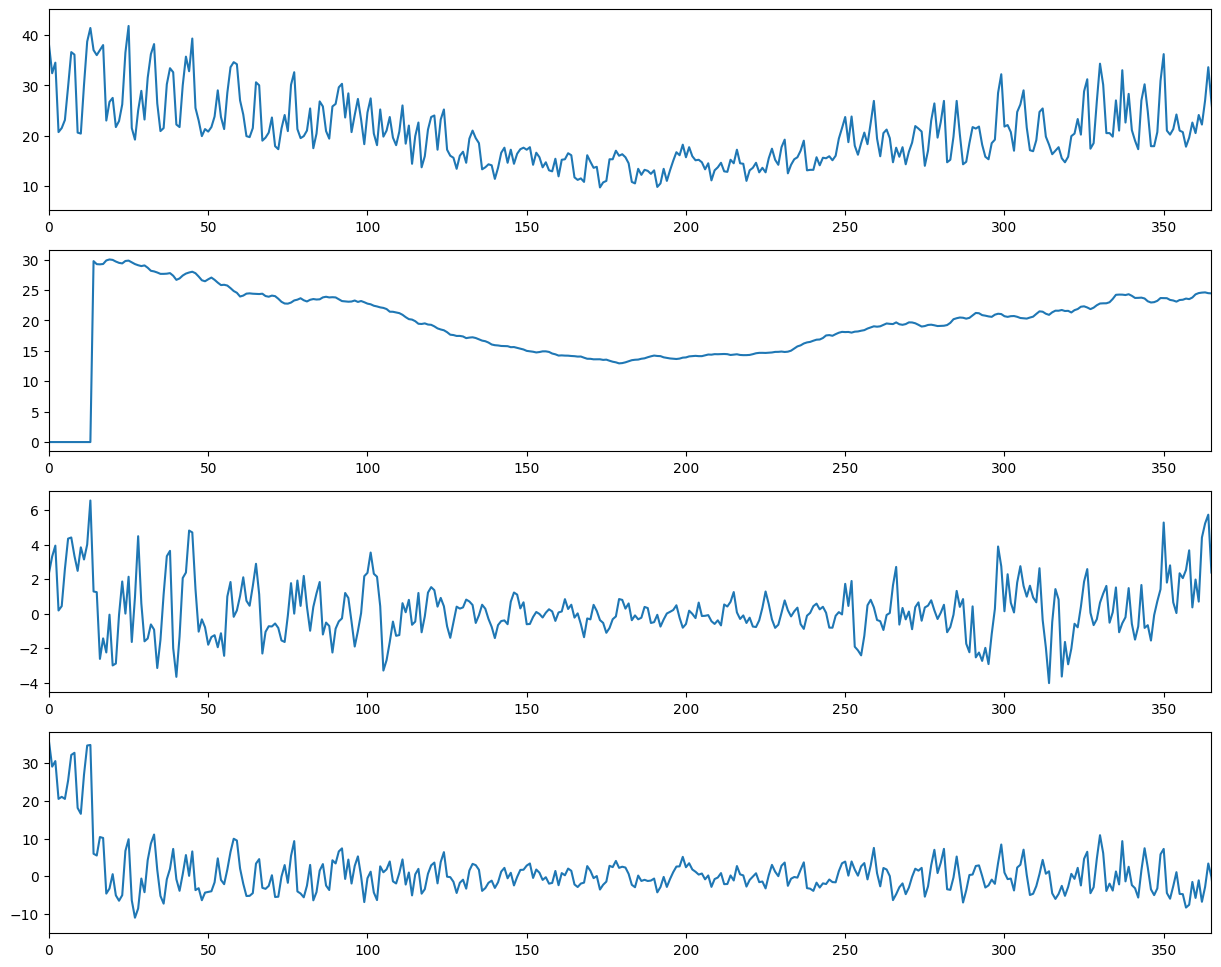

In [95]:
plt.figure(figsize= (15,3*4))
plt.subplot(4,1,1)
plt.xlim(0,365)
plt.plot(temperature)
plt.subplot(4,1,2)
plt.xlim(0,365)
plt.plot(trend)
plt.subplot(4,1,3)
plt.xlim(0,365)
plt.plot(seasonal)
plt.subplot(4,1,4)
plt.xlim(0,365)
plt.plot(residual)


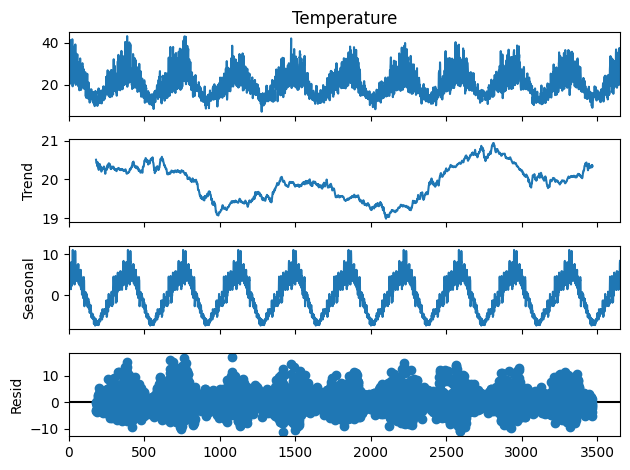

<Figure size 1500x1200 with 0 Axes>

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(temperature, model='additive', period=365)
result.plot()
plt.figure(figsize= (15,3*4))
plt.show()

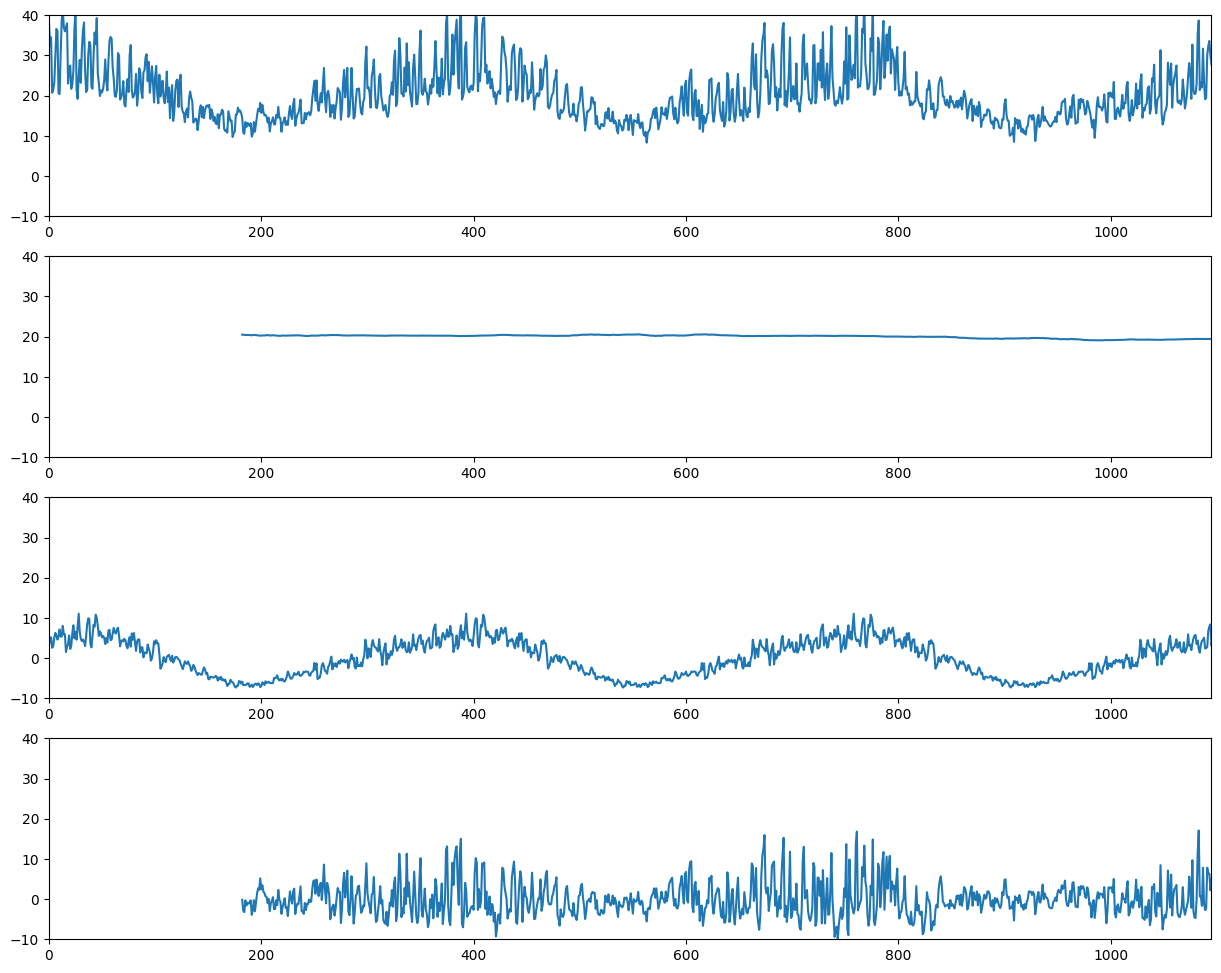

In [100]:
temperature = data['Temperature']
res = seasonal_decompose(temperature, model='additive', period=365)
plt.figure(figsize= (15,3*4))
plt.subplot(4,1,1) ; plt.plot(temperature) ; plt.xlim(0,365*3) ; plt.ylim(-10, 40)
plt.subplot(4,1,2) ; plt.plot(res.trend) ; plt.xlim(0,365*3) ; plt.ylim(-10, 40)
plt.subplot(4,1,3) ; plt.plot(res.seasonal) ; plt.xlim(0,365*3) ; plt.ylim(-10, 40)
plt.subplot(4,1,4) ; plt.plot(res.resid) ; plt.xlim(0,365*3) ; plt.ylim(-10, 40)
plt.show()